In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from ydata_profiling import ProfileReport
from zipfile import ZipFile
from pandas.io.stata import StataReader

C:\Users\LENOVO\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\LENOVO\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\LENOVO\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
C:\Users\LENOVO\anaconda3\lib\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\visions\backends\shared\nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit de

In [2]:
cwd = os.getcwd()
dataset_path_unzipped = os.path.join(cwd, 'Data Sampel Final 2022')

dataset_raw = os.listdir(dataset_path_unzipped)

# get all dataset path (not directory) into one variable (dataset_file_path)
folder = [os.path.join(dataset_path_unzipped, dataset) for dataset in dataset_raw if os.path.isdir(os.path.join(dataset_path_unzipped, dataset))]
dataset_file_path = []
i = 0

while folder:
    folder_pop = folder.pop()
    temps = os.listdir(folder_pop)
    for temp in temps:
        if os.path.isdir(os.path.join(folder_pop, temp)):
            folder.append(os.path.join(folder_pop, temp))
        else:
            if temp.split('.')[1] == 'dta':
                dataset_file_path.append([os.path.join(folder_pop, temp), i])
                i += 1

dataset_file_path

[['C:\\Users\\LENOVO\\GitHub\\healthkathon-bpjs-sukasukaaja\\Data Sampel Final 2022\\Reguler\\2015202101_kepesertaan.dta',
  0],
 ['C:\\Users\\LENOVO\\GitHub\\healthkathon-bpjs-sukasukaaja\\Data Sampel Final 2022\\Reguler\\202103_fkrtl.dta',
  1],
 ['C:\\Users\\LENOVO\\GitHub\\healthkathon-bpjs-sukasukaaja\\Data Sampel Final 2022\\Reguler\\202104_nonkapitasi.dta',
  2],
 ['C:\\Users\\LENOVO\\GitHub\\healthkathon-bpjs-sukasukaaja\\Data Sampel Final 2022\\Reguler\\202105_diagnosissekunder.dta',
  3],
 ['C:\\Users\\LENOVO\\GitHub\\healthkathon-bpjs-sukasukaaja\\Data Sampel Final 2022\\Kontekstual TB\\TB20152021_fkrtl.dta',
  4],
 ['C:\\Users\\LENOVO\\GitHub\\healthkathon-bpjs-sukasukaaja\\Data Sampel Final 2022\\Kontekstual TB\\TB20152021_fkrtldxsekunder.dta',
  5],
 ['C:\\Users\\LENOVO\\GitHub\\healthkathon-bpjs-sukasukaaja\\Data Sampel Final 2022\\Kontekstual TB\\TB20152021_fktpnonkapitasi.dta',
  6],
 ['C:\\Users\\LENOVO\\GitHub\\healthkathon-bpjs-sukasukaaja\\Data Sampel Final 2022\\K

In [3]:
def read_file(path):
    format_data = path.split('.')[1]
    if format_data == 'dta':
        df = pd.read_stata(path)
        test_df = StataReader(r'{}'.format(path))
        var_labels = test_df.variable_labels()
        df = df.rename(columns = var_labels)
    else:
        df = pd.read_excel(path)
    return df

In [36]:
df_reguler_kepesertaan = read_file(dataset_file_path[0][0])
df_reguler_kepesertaan.describe()

,Nomor peserta,Nomor keluarga,Tanggal lahir peserta,Bobot,Tahun Sampel,Tahun Meninggal
count,2.305435e+06,2.305435e+06,2305435,2.305435e+06,2.305435e+06,52575.000000
mean,1.464245e+08,1.404410e+08,1986-08-08 12:44:24.946441408,1.136196e+02,2.016751e+03,2018.255350
min,1.500000e+01,1.500000e+01,1900-07-01 00:00:00,1.947860e-01,2.016000e+03,2014.000000
25%,6.029305e+07,5.575948e+07,1972-11-29 00:00:00,1.313153e+01,2.016000e+03,2017.000000
50%,1.216040e+08,1.142158e+08,1988-07-24 00:00:00,4.401931e+01,2.016000e+03,2019.000000
75%,1.964080e+08,1.915267e+08,2002-08-01 00:00:00,1.222808e+02,2.017000e+03,2020.000000
max,4.605590e+08,4.605590e+08,2021-12-30 00:00:00,5.386168e+04,2.021000e+03,2021.000000
std,1.120289e+08,1.106739e+08,NaN,2.643628e+02,1.446133e+00,2.052294


In [37]:
df_reguler_fkrtl = read_file(dataset_file_path[1][0])
df_reguler_fkrtl.describe()

,Nomor peserta,Nomor keluarga,Bobot,Tanggal datang kunjungan FKRTL,Tanggal pulang kunjungan FKRTL,INACBGs - Spesifikasi kelompok kasus (Digit ke-3),Group Tarif INACBGs,Tarif special sub-acute groups (SA),Tarif special procedures (SP),Tarif special prosthesis (RR),Tarif special investigation(SI),Tarif special drugs (SD),Biaya Tagih - oleh fasilitas kesehatan (provider),Biaya Verifikasi - BPJS Kesehatan setelah dilakukan verifikasi
count,8.722010e+05,8.722010e+05,872201.000000,872201,872201,872201.000000,8.722010e+05,8.722010e+05,8.722010e+05,8.722010e+05,8.722010e+05,8.722010e+05,8.722010e+05,8.722010e+05
mean,1.407332e+08,1.404167e+08,79.515320,2021-07-10 01:50:54.535823104,2021-07-10 10:58:32.055593216,30.807534,8.372282e+05,3.620109e+02,2.066690e+04,2.269116e+03,1.603546e+03,9.526411e+03,8.717836e+05,8.706864e+05
min,1.144000e+03,2.147000e+03,0.504971,2020-07-03 00:00:00,2021-01-01 00:00:00,1.000000,6.820000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.820000e+04,0.000000e+00
25%,4.129074e+07,4.347448e+07,10.400174,2021-04-08 00:00:00,2021-04-08 00:00:00,16.000000,1.849000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.849000e+05,1.849000e+05
50%,8.357546e+07,8.744769e+07,33.826828,2021-07-08 00:00:00,2021-07-08 00:00:00,42.000000,1.922000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.922000e+05,1.922000e+05
75%,2.236668e+08,2.159169e+08,90.344948,2021-10-15 00:00:00,2021-10-15 00:00:00,44.000000,3.959000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.959000e+05,3.959000e+05
max,4.605538e+08,4.605247e+08,18235.558594,2021-12-31 00:00:00,2021-12-31 00:00:00,84.000000,3.125353e+08,1.843370e+07,4.974100e+07,1.007643e+08,3.332900e+06,1.586110e+07,3.125353e+08,3.125353e+08
std,1.331351e+08,1.290404e+08,170.802002,NaN,NaN,14.135539,2.614295e+06,6.692782e+04,3.791299e+05,2.198844e+05,5.480110e+04,2.552267e+05,2.773236e+06,2.766543e+06


In [38]:
df_reguler_nonkapitasi = read_file(dataset_file_path[2][0])
df_reguler_nonkapitasi.describe()

,Nomor Peserta,Nomor keluarga,Bobot,Tanggal kunjungan,Tanggal tindakan,Tanggal pulang,Biaya tagih,Biaya verifikasi
count,9.561700e+04,9.561700e+04,95617.000000,95617,95617,95617,9.561700e+04,9.561700e+04
mean,9.997859e+07,1.058877e+08,72.068489,2021-07-12 20:45:42.591798528,2021-07-12 22:08:16.154449664,2021-07-13 00:15:17.159082240,1.301120e+05,1.301120e+05
min,2.339500e+04,2.283500e+04,0.504971,2020-12-27 00:00:00,2020-12-30 00:00:00,2021-01-01 00:00:00,1.000000e+04,1.000000e+04
25%,3.332184e+07,3.615472e+07,12.081010,2021-04-09 00:00:00,2021-04-09 00:00:00,2021-04-09 00:00:00,3.000000e+04,3.000000e+04
50%,6.704268e+07,7.450574e+07,36.032928,2021-07-12 00:00:00,2021-07-12 00:00:00,2021-07-12 00:00:00,4.500000e+04,4.500000e+04
75%,1.005230e+08,1.151735e+08,84.882233,2021-10-15 00:00:00,2021-10-15 00:00:00,2021-10-15 00:00:00,1.200000e+05,1.200000e+05
max,4.599362e+08,4.599362e+08,11384.331055,2021-12-31 00:00:00,2021-12-31 00:00:00,2021-12-31 00:00:00,8.663400e+06,8.663400e+06
std,1.065886e+08,1.046051e+08,137.700760,NaN,NaN,NaN,2.165907e+05,2.165907e+05


In [39]:
df_reguler_diagnosis_sekunder = read_file(dataset_file_path[3][0])
df_reguler_diagnosis_sekunder.describe()

,,Kode diagnosis ICD 10 (beragam 3-5 digit),Kode diagnosis ICD 10 (3 digit),Kode dan nama diagnosis ICD 10 (3 digit)
count,925803,925803,925803,925803
unique,676083,6936,1615,1612
top,315950121V024571,N185,N18,N18 Chronic kidney disease
freq,15,44903,58540,58540


In [32]:
df_reguler_prov = pd.DataFrame(df_reguler_kepesertaan.groupby(['Provinsi Tempat Tinggal Peserta'])['Provinsi Tempat Tinggal Peserta'].count())

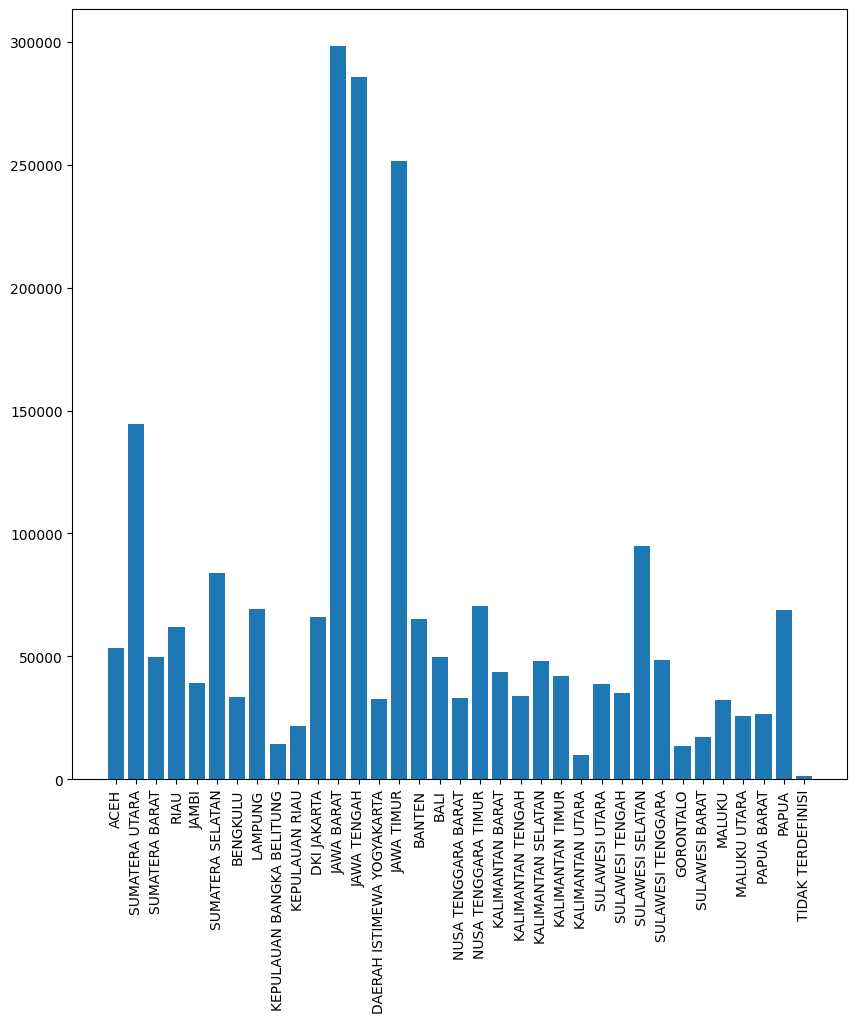

In [31]:
plt.figure(figsize = (10,10))
plt.bar(x = df_reguler_prov.index, height = df_reguler_prov['Provinsi Tempat Tinggal Peserta'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
df_reguler_sumsel = 

In [33]:
# all_variable = {}
# for data_path in dataset_file_path:
#     stata_reader = StataReader(r'{}'.format(data_path[0]))
#     var_labels = stata_reader.variable_labels()
#     for label in var_labels:
#         if label not in all_variable:
#             all_variable[label] = var_labels[label]
    
# nama_variabel = list(all_variable.values())
# for i in range(1, len(nama_variabel)):
#     print("{}. {}".format(i, nama_variabel[i]))